## Outlier Removal using Z-Score Method
Outlier detection using the Z-score method is a statistical technique that identifies data points that deviate significantly from the mean of a distribution. The Z-score measures how far a data point is from the mean in terms of standard deviations. If a data point has a Z-score greater than a certain threshold, it is considered an outlier.

Here are the steps involved in outlier detection using the Z-score method:

### Z-Score Calculation:

1. **Calculate the Mean $\mu$ and Standard Deviation $\sigma$:**
   - Compute the mean and standard deviation of the dataset.

2. **Calculate Z-Score for Each Data Point:**
   - For each data point $x_i$, calculate the Z-score using the formula: $ Z_i = \frac{x_i - \mu}{\sigma} $

### Outlier Identification:

3. **Set a Threshold for Z-Score:**
   - Choose a threshold value $Z_{\text{threshold}}$ beyond which data points are considered outliers. Common threshold values are 2, 2.5, or 3.

4. **Identify Outliers:**
   - Any data point with a Z-score greater than the threshold is considered an outlier.

Keep in mind that removing outliers can significantly impact the distribution and statistics of your data, so it's important to carefully consider the context and potential consequences before deciding to remove outliers. Additionally, there are other methods for outlier detection and handling that may be more appropriate for certain situations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
783,6.23,24.0,1
944,7.21,21.0,1
184,7.78,33.0,0
392,6.76,35.0,0
695,6.75,11.0,1


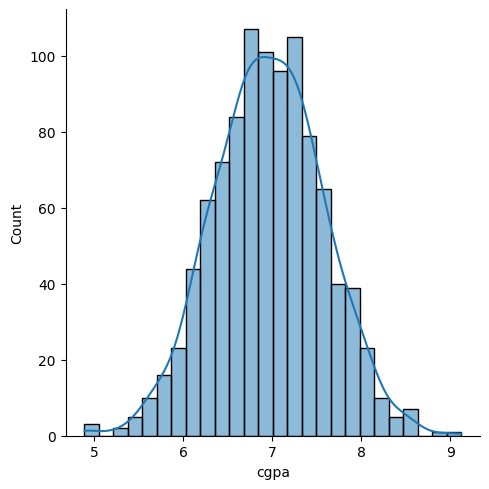

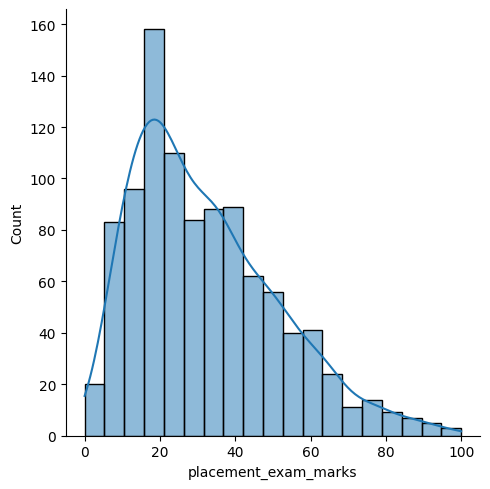

In [5]:
sns.displot(df['cgpa'], kde=True)
sns.displot(df['placement_exam_marks'], kde=True)
plt.show()

In [6]:
df['cgpa'].skew()

-0.014529938929314918

In [7]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [8]:
print("Mean value of cgpa: ",df['cgpa'].mean())
print("Std value of cgpa: ",df['cgpa'].std())
print("Min value of cgpa: ",df['cgpa'].min())
print("Max value of cgpa: ",df['cgpa'].max())

Mean value of cgpa:  6.96124
Std value of cgpa:  0.6158978751323896
Min value of cgpa:  4.89
Max value of cgpa:  9.12


In [14]:
# Finding boundary values
print("Highest allowed: ", df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed: ", df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed:  8.808933625397168
Lowest allowed:  5.113546374602832


In [15]:
# Finding outliers
df[(df['cgpa']>8.808933625397168) | (df['cgpa']<5.113546374602832)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


**Trimming**

In [16]:
new_df = df[(df['cgpa']<=8.808933625397168) & (df['cgpa']>=5.113546374602832)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [17]:
# 2nd Approach - Calculating z-score
df['cgpa_z_score'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [20]:
df[(df['cgpa_z_score']>3) | (df['cgpa_z_score']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [21]:
# Trimming
new_df_z_score = df[(df['cgpa_z_score']<=3) & (df['cgpa_z_score']>=-3)]
new_df_z_score

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


**Capping**

In [22]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
print(upper_limit)
print(lower_limit)

8.808933625397168
5.113546374602832


In [25]:
df['cgpa'] = np.where(df['cgpa']>upper_limit, upper_limit, np.where(df['cgpa']<lower_limit, lower_limit, df['cgpa']))

In [26]:
df.shape

(1000, 4)

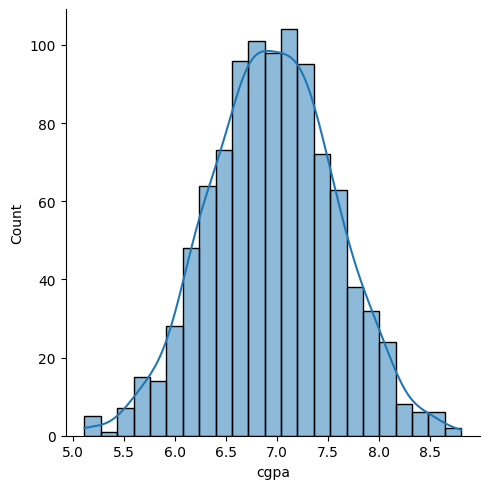

In [27]:
sns.displot(df['cgpa'], kde=True)

In [28]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64